<a href="https://colab.research.google.com/github/akhilps45/ICT-Assignments/blob/main/Image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
image = cv2.imread('/content/sample_data/Akhil.jpg')
image

array([[[100,  95,  92],
        [ 99,  96,  92],
        [ 99,  96,  92],
        ...,
        [113, 114, 110],
        [115, 115, 109],
        [115, 115, 109]],

       [[100,  95,  92],
        [ 99,  96,  92],
        [ 99,  96,  92],
        ...,
        [113, 114, 110],
        [115, 115, 109],
        [115, 115, 109]],

       [[100,  95,  92],
        [ 99,  96,  92],
        [ 99,  96,  92],
        ...,
        [112, 113, 109],
        [113, 114, 110],
        [113, 114, 110]],

       ...,

       [[ 34,  66,  89],
        [ 26,  60,  84],
        [ 64, 101, 129],
        ...,
        [ 94, 113, 121],
        [ 93, 112, 120],
        [ 92, 111, 119]],

       [[ 44,  80, 104],
        [ 35,  72,  98],
        [ 74, 112, 142],
        ...,
        [ 94, 113, 121],
        [ 90, 111, 119],
        [ 90, 111, 119]],

       [[ 41,  79, 103],
        [ 31,  71,  96],
        [ 71, 110, 142],
        ...,
        [ 93, 112, 120],
        [ 90, 111, 119],
        [ 89, 110, 118]]

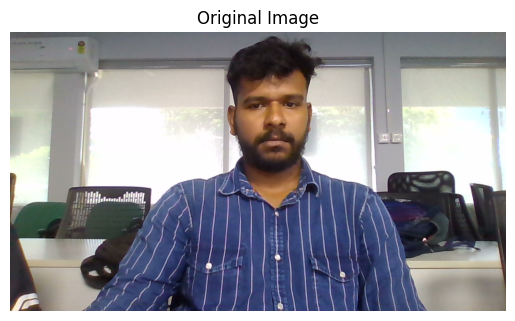

In [4]:
#convert image to rgb
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image
# Show original image
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [5]:
original_shape = image.shape
pixel_values = image.reshape((-1, 3))
print("Shape of flattened data (pixels, features):", pixel_values.shape)

Shape of flattened data (pixels, features): (921600, 3)


In [6]:
#apply k means
k=2
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(pixel_values)
# Get the clustered labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_.astype(np.uint8)


In [7]:
#replace each pixel with its cluster center
segmented_img = kmeans.cluster_centers_[labels]
segmented_img = segmented_img.reshape(original_shape)

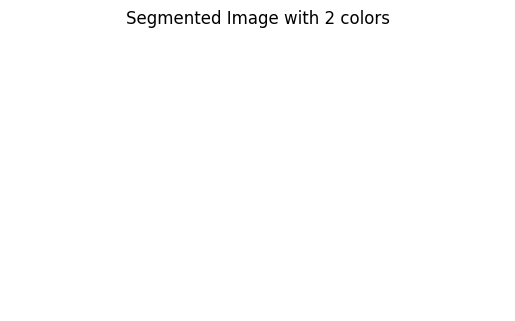

In [8]:
# Show the segmented image

plt.imshow(segmented_img)
plt.title(f"Segmented Image with {k} colors")
plt.axis("off")
plt.show()

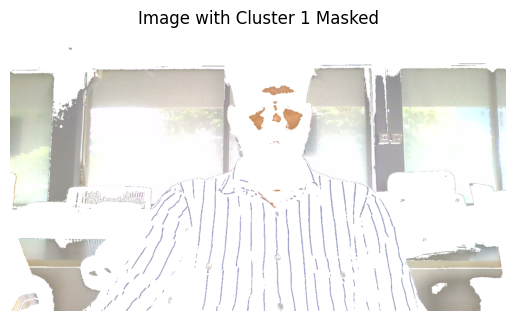

In [9]:
# Choose which cluster to mask
cluster_to_mask = 1

# Make a copy of the segmented image data
masked_pixel_data = pixel_values.copy()

# Mask the chosen cluster: set to white (255, 255, 255)
masked_pixel_data[labels == cluster_to_mask] = [255, 255, 255]

# Reshape back to original image shape
masked_image = masked_pixel_data.reshape(original_shape)

# Display the masked image
plt.imshow(masked_image)
plt.title(f"Image with Cluster {cluster_to_mask} Masked")
plt.axis("off")
plt.show()